In [38]:
from IPython.core.interactiveshell import InteractiveShell
from datetime import datetime
import pymystem3
import pymorphy2
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm
import seaborn as sns
import scipy.stats as st
from scipy.stats import norm
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.svm import LinearSVC, SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from gensim.models.word2vec import Word2Vec
from gensim.models.word2vec import LineSentence
from gensim.models import KeyedVectors
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from gensim.models import Phrases
from gensim.models.phrases import Phraser
import warnings
from bs4 import BeautifulSoup
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

## Data Uploading

In [39]:
df_train = pd.read_csv('train.csv')
df_train.tail()

,Month,Sunspots
2288,1939-09,112.6
2289,1939-10,88.1
2290,1939-11,68.1
2291,1939-12,42.1
2292,1940-01,50.5


In [40]:
df_train.shape

(2293, 2)

In [41]:
df_test = pd.read_csv('test.csv')

## Modeling

In [42]:
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

In [200]:
# number of future predictions
predictions = 528

# creating a specific format dataset 
df = df_train.copy()
df.columns = ['ds', 'y']
df.tail()

,ds,y
2288,1939-09,112.6
2289,1939-10,88.1
2290,1939-11,68.1
2291,1939-12,42.1
2292,1940-01,50.5


In [214]:
# reserve some data for testing
train_df = df[:-predictions]

In [215]:
# declaring the model, it's necessary to pay attention to seasonality type we want to use
prothet_model = Prophet(changepoint_prior_scale=0.08, yearly_seasonality=True)
prothet_model.fit(train_df)

# creating one more specific dataset for predictions
future = prothet_model.make_future_dataframe(periods=predictions, freq='M')
future.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
2288,1939-08-31
2289,1939-09-30
2290,1939-10-31
2291,1939-11-30
2292,1939-12-31


In [223]:
forecast = prothet_model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1749-01-01,43.977491,-2.789089,89.179558,43.977491,43.977491,-1.231326,-1.231326,-1.231326,-1.231326,-1.231326,-1.231326,0.0,0.0,0.0,42.746165
1,1749-02-01,44.032959,-4.268244,94.180145,44.032959,44.032959,-1.573807,-1.573807,-1.573807,-1.573807,-1.573807,-1.573807,0.0,0.0,0.0,42.459152
2,1749-03-01,44.083058,-6.727093,92.306580,44.083058,44.083058,-2.779402,-2.779402,-2.779402,-2.779402,-2.779402,-2.779402,0.0,0.0,0.0,41.303656
3,1749-04-01,44.138526,0.280853,87.261303,44.138526,44.138526,0.066728,0.066728,0.066728,0.066728,0.066728,0.066728,0.0,0.0,0.0,44.205254
4,1749-05-01,44.192204,2.213679,94.142525,44.192204,44.192204,4.337346,4.337346,4.337346,4.337346,4.337346,4.337346,0.0,0.0,0.0,48.529551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,1983-08-31,11.584641,-108.662651,119.903766,-90.520474,104.596949,0.656748,0.656748,0.656748,0.656748,0.656748,0.656748,0.0,0.0,0.0,12.241389
2817,1983-09-30,11.557012,-92.255327,129.389771,-90.792427,104.724996,6.453756,6.453756,6.453756,6.453756,6.453756,6.453756,0.0,0.0,0.0,18.010769
2818,1983-10-31,11.528463,-113.024802,106.892233,-91.053634,104.857312,-11.647406,-11.647406,-11.647406,-11.647406,-11.647406,-11.647406,0.0,0.0,0.0,-0.118943
2819,1983-11-30,11.500834,-105.957625,119.296976,-91.254928,104.985360,-1.962221,-1.962221,-1.962221,-1.962221,-1.962221,-1.962221,0.0,0.0,0.0,9.538614


Mean absolute error 28.74


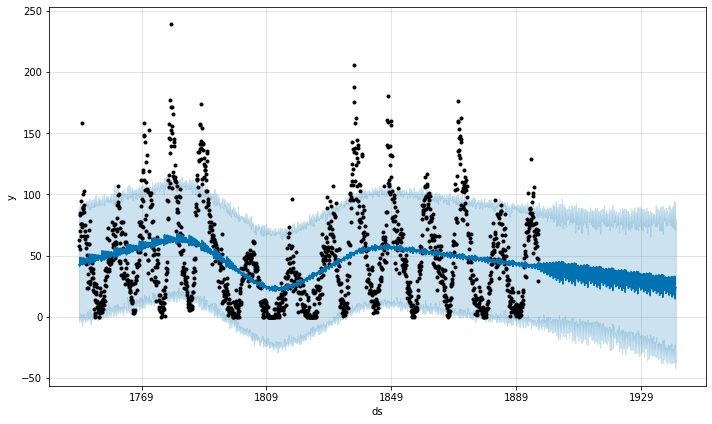

In [217]:
error = mean_absolute_error(df[-predictions:]['y'], forecast[-predictions:]['yhat'])
print("Mean absolute error {0:.2f}".format(error))
_ = prothet_model.plot(forecast)

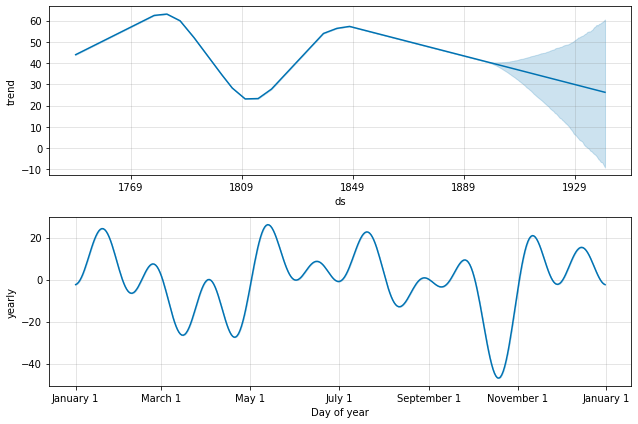

In [205]:
_ = prothet_model.plot_components(forecast)

## Prediction

In [219]:
prothet_model_test = Prophet(changepoint_prior_scale=0.08, yearly_seasonality=True)
prothet_model_test.fit(df)
future = prothet_model_test.make_future_dataframe(periods=predictions, freq='M')
future.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
2816,1983-08-31
2817,1983-09-30
2818,1983-10-31
2819,1983-11-30
2820,1983-12-31


## Submition

In [220]:
pred = pd.DataFrame(
    zip(df_test['Month'], forecast['yhat'][-predictions:]), 
    columns = ['Month', 'Sunspots'])

In [221]:
pred

,Month,Sunspots
0,1940-01,45.134345
1,1940-02,42.140055
2,1940-03,40.713574
3,1940-04,38.758146
4,1940-05,40.727622
...,...,...
523,1983-08,27.041989
524,1983-09,32.811369
525,1983-10,14.681657
526,1983-11,24.339214


In [208]:
pred.to_csv('pred_hw12.csv', index=False)